MAE: 2.8338
MAPE: 101.6113
RMSE: 3.5176


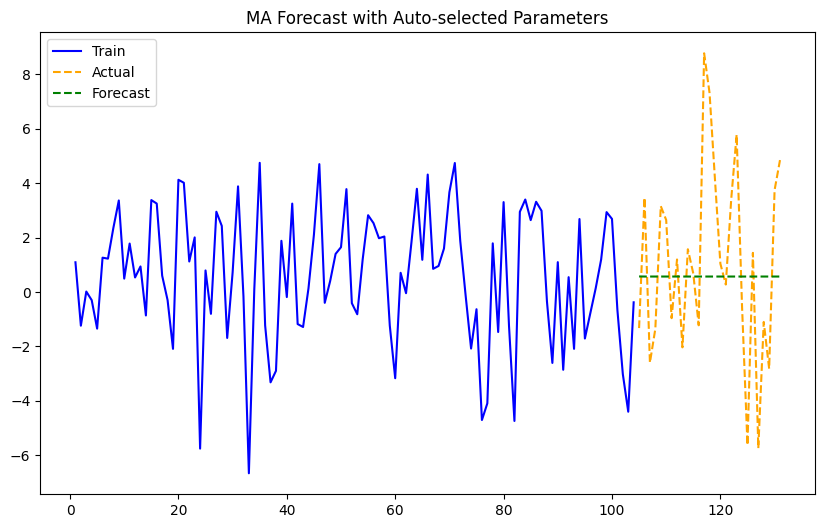

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('../p1/ML471_S2_Datafile_Practice.csv')
series = df['Close_diff'].dropna().reset_index(drop=True)

train_size = 104
train = series.iloc[:train_size]
test = series.iloc[train_size:]

best_aic, best_q = float("inf"), 1
for q in range(1, 6):
    res = ARIMA(train, order=(0, 0, q)).fit()
    if res.aic < best_aic:
        best_aic, best_q = res.aic, q

model = ARIMA(train, order=(0, 0, best_q)).fit()
forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, train_size + 1), train, label='Train', color='blue')
plt.plot(range(train_size + 1, len(series) + 1), test, label='Actual', color='orange', linestyle='--')
plt.plot(range(train_size + 1, len(series) + 1), forecast, label='Forecast', color='green', linestyle='--')
plt.title('MA Forecast with Auto-selected Parameters')
plt.legend()
plt.show()